In [0]:
# import all modules needed
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

In [24]:
# grab train and test data from mnist dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# checkout the dataset dimension
print('train X shape:', train_X.shape)
print('test X shape:', test_X.shape)
print('train y shape:', train_y.shape)
print('test y shape:', test_y.shape)

train X shape: (60000, 28, 28)
test X shape: (10000, 28, 28)
train y shape: (60000,)
test y shape: (10000,)


Label:  5


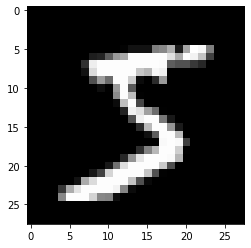

In [25]:
# look into one of the dataset and corresponding label
plt.imshow(train_X[0], cmap=plt.get_cmap('gray'))
print('Label: ', train_y[0])

In [26]:
# reshape the shape of trainX and testX to fit in the model
# 28x28 for the width x height of pic
# 1 color channel (greyscale)
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

# Dimension of trainX after reshape
print(train_X.shape)

(60000, 28, 28, 1)


In [0]:
from keras.utils import to_categorical

# convert label to one-hot encoding
# array of length 10 (10 labels)
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [0]:
# normalize data from 0-255 to 0-1
# speed up the training process
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

optimizer = Adam(lr=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [31]:
# train model with 0.3 split for validation
model.fit(train_X, train_y, epochs=10, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 28s 664us/step - loss: 0.4425 - accuracy: 0.8899 - val_loss: 0.2240 - val_accuracy: 0.9364
Epoch 2/10
42000/42000 [==============================] - 28s 655us/step - loss: 0.1834 - accuracy: 0.9468 - val_loss: 0.1546 - val_accuracy: 0.9562
Epoch 3/10
42000/42000 [==============================] - 28s 655us/step - loss: 0.1312 - accuracy: 0.9633 - val_loss: 0.1240 - val_accuracy: 0.9651
Epoch 4/10
42000/42000 [==============================] - 28s 658us/step - loss: 0.1012 - accuracy: 0.9719 - val_loss: 0.1084 - val_accuracy: 0.9695
Epoch 5/10
42000/42000 [==============================] - 28s 663us/step - loss: 0.0832 - accuracy: 0.9765 - val_loss: 0.0928 - val_accuracy: 0.9736
Epoch 6/10
42000/42000 [==============================] - 28s 661us/step - loss: 0.0695 - accuracy: 0.9806 - val_loss: 0.0855 - val_accuracy: 0.9752
Epoch 7/10
42000/42000 [==============================] 

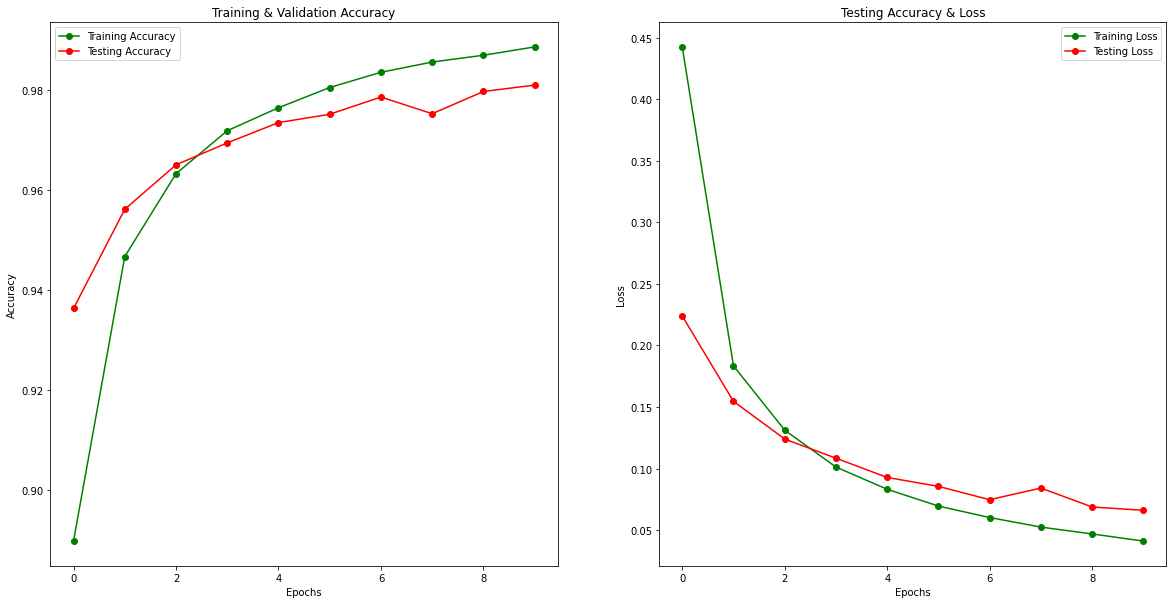

In [32]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = model.history.history['accuracy']
train_loss = model.history.history['loss']
val_acc = model.history.history['val_accuracy']
val_loss = model.history.history['val_loss']
fig.set_size_inches(20,10)

# plot the model training and testing accuracy in each epoch
ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

# plot the model training and testing loss in each epoch
ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [33]:
# Evaluate model on testing dataset
print("Loss of the model is - " , model.evaluate(test_X, test_y)[0] , "%")
print("Accuracy of the model is - " , model.evaluate(test_X, test_y)[1]*100 , "%")

10000/10000 [==============================] - 2s 164us/step
Loss of the model is -  0.057189586914516984 %
10000/10000 [==============================] - 2s 164us/step
Accuracy of the model is -  98.12999963760376 %


In [0]:
# convert one-hot encoding to label
class_y = [np.argmax(y, axis=None, out=None) for y in test_y]

In [44]:
from sklearn.metrics import confusion_matrix

# confusion matrix to show the models prediction against true label
cm = confusion_matrix(class_y, model.predict_classes(test_X))
cm

array([[ 970,    0,    0,    0,    1,    1,    3,    3,    2,    0],
       [   0, 1129,    2,    0,    0,    0,    2,    1,    1,    0],
       [   3,    6, 1012,    0,    2,    0,    2,    7,    0,    0],
       [   0,    0,    0,  999,    0,    2,    0,    7,    2,    0],
       [   0,    0,    1,    0,  974,    0,    0,    0,    1,    6],
       [   2,    0,    0,    6,    0,  875,    5,    0,    3,    1],
       [   8,    3,    1,    0,    2,    3,  937,    1,    3,    0],
       [   0,    2,    8,    1,    0,    0,    0, 1014,    1,    2],
       [   6,    1,    9,    5,    1,    3,    1,   10,  930,    8],
       [   4,    4,    1,    4,    9,    0,    0,   14,    0,  973]])